   project_id project_name  start_date    end_date  timeline_days  num_tasks  \
0           1    Project_1  2020-01-01  2020-03-22             81         83   
1           2    Project_2  2020-01-08  2020-02-21             44         16   
2           3    Project_3  2020-01-15  2020-04-14             90         42   
3           4    Project_4  2020-01-22  2020-03-12             50         32   
4           5    Project_5  2020-01-29  2020-03-22             53         94   

   team_size  budget complexity  resources_used  
0         11  197756     Medium            2739  
1          8  195665     Medium             256  
2         17  231717     Medium            1428  
3          5  262002     Medium             640  
4         16  361691       High            4512  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   project_id      1000

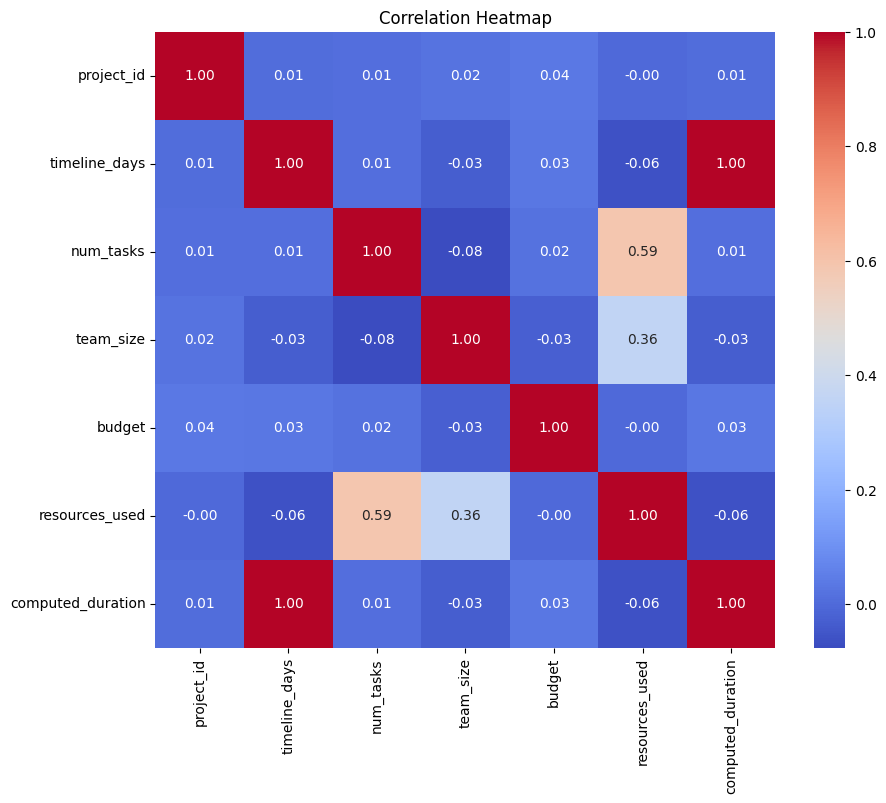

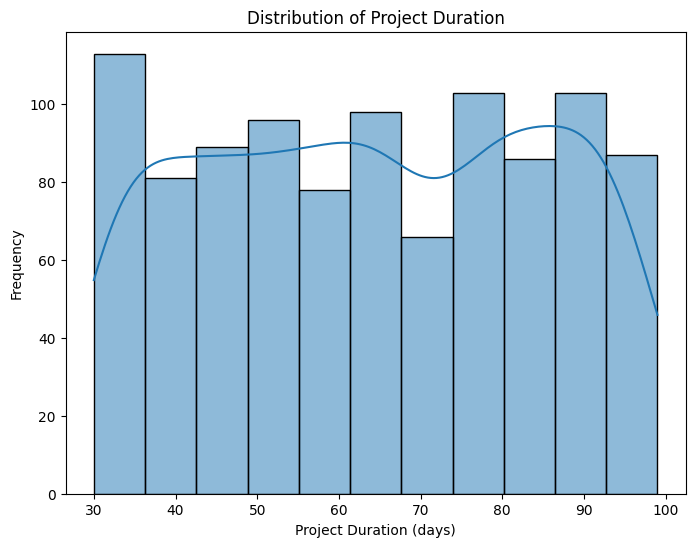

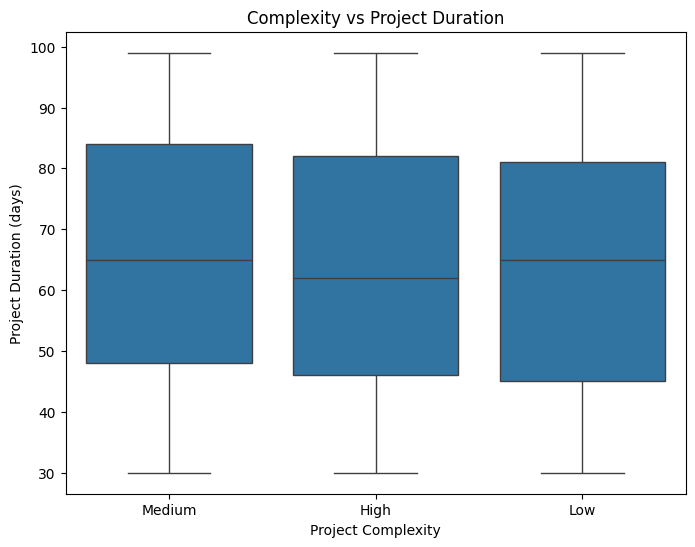

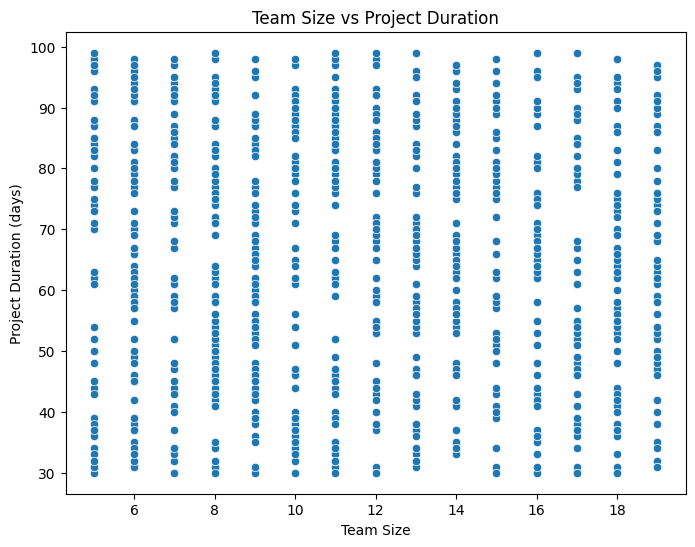

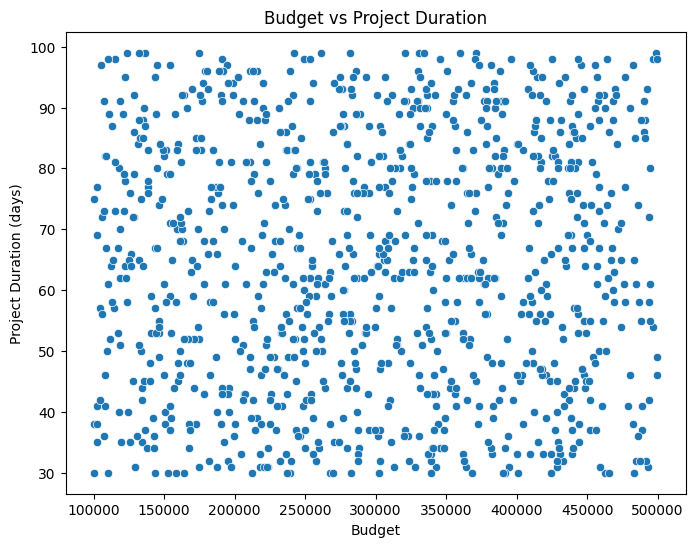

In [9]:
# exploratory_data_analysis.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('historical_project_data.csv')

# Overview
print(data.head())
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Convert dates to datetime for consistency (in case some tools might alter the format)
data['start_date'] = pd.to_datetime(data['start_date'])
data['end_date'] = pd.to_datetime(data['end_date'])

# Compute duration in days (redundant as timeline_days is already given, but good to double-check)
data['computed_duration'] = (data['end_date'] - data['start_date']).dt.days

# Visualizations

# Correlation heatmap (exclude non-numeric data)
plt.figure(figsize=(10, 8))
numeric_data = data.select_dtypes(include='number')
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Distribution of project duration
plt.figure(figsize=(8, 6))
sns.histplot(data['timeline_days'], kde=True)
plt.title('Distribution of Project Duration')
plt.xlabel('Project Duration (days)')
plt.ylabel('Frequency')
plt.show()

# Complexity vs. Project Duration
plt.figure(figsize=(8, 6))
sns.boxplot(x='complexity', y='timeline_days', data=data)
plt.title('Complexity vs Project Duration')
plt.xlabel('Project Complexity')
plt.ylabel('Project Duration (days)')
plt.show()

# Team size vs. Project Duration
plt.figure(figsize=(8, 6))
sns.scatterplot(x='team_size', y='timeline_days', data=data)
plt.title('Team Size vs Project Duration')
plt.xlabel('Team Size')
plt.ylabel('Project Duration (days)')
plt.show()

# Budget vs. Project Duration
plt.figure(figsize=(8, 6))
sns.scatterplot(x='budget', y='timeline_days', data=data)
plt.title('Budget vs Project Duration')
plt.xlabel('Budget')
plt.ylabel('Project Duration (days)')
plt.show()
